In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

## 사전작업

In [5]:
# ---------------------------사전작업----------------------------------
mpg = pd.read_csv('mpg.csv')
# mpg.csv를 불러온다.

mpg.loc[[9,13,57,92],['drv']] = 'k'
# drv 컬럼의 9,13,57,92 행의 값에 k 라는 이상치를 할당.


mpg.loc[[20,42,128,202],['cty']] = [3,4,39,42]
# cty 컬럼의 20,42,128,202 행의 값에 극단치를 할당
# --------------------------------------------------------------------

In [6]:
# 이상치 할당 확인
mpg.loc[[9,13,57,92]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
9,audi,a4 quattro,2.0,2008,4,manual(m6),k,20,28,p,compact
13,audi,a4 quattro,3.1,2008,6,auto(s6),k,17,25,p,compact
57,dodge,durango 4wd,3.9,1999,6,auto(l4),k,13,17,r,suv
92,ford,mustang,4.0,2008,6,manual(m5),k,17,26,r,subcompact


In [7]:
# 극단치 할당 확인
mpg.loc[[20,42,128,202]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,3,20,r,suv
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,4,24,r,minivan
128,jeep,grand cherokee 4wd,5.7,2008,8,auto(l5),4,39,18,r,suv
202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,42,22,r,pickup


## 1. 이상치

In [8]:
# --------------------이상치 k 를 할당받은 drv 컬럼들-------------------
print(mpg['drv'].value_counts())
# mpg의 drv 컬럼의 각 값들을 카운팅한다
# --------------------------------------------------------------------

f    106
4    100
r     24
k      4
Name: drv, dtype: int64


In [9]:
#-------------------------이상치를 결측치 처리--------------------------
mpg['drv'] = np.where(mpg['drv']=='k',np.nan,mpg['drv'])
# mpg의 drv 컬럼을 확인하면서 값이 이상치 k 면 결측처리 아니면 놔두기.

# mpg['drv'] = np.where(mpg['drv'].isin(['4','f','r']),mpg['drv'],np.nan)
# 위 방법은 또다른 결측 처리 방법이다.
# .isin()으로 drv컬럼의 값이 괄호안의 값인 정상값들이면 놔두고,
# 아니면 결측처리 한다는 뜻.

In [10]:
# 결측처리 확인
mpg.loc[[9,13,57,92]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
9,audi,a4 quattro,2.0,2008,4,manual(m6),NaN,20,28,p,compact
13,audi,a4 quattro,3.1,2008,6,auto(s6),NaN,17,25,p,compact
57,dodge,durango 4wd,3.9,1999,6,auto(l4),NaN,13,17,r,suv
92,ford,mustang,4.0,2008,6,manual(m5),NaN,17,26,r,subcompact


In [11]:
#------------------------결측치 제거------------------------------------
mpg = mpg.dropna(subset=['drv'])
# 실제 데이터에 변화를 주고싶으면 위 처럼 재할당 식으로 하던가
# .dropna(inplace=True) 를 이용한다.
# 여기선 재할당 방식으로 한다.
#----------------------------------------------------------------------


In [13]:
# 결측치 제거확인
mpg['drv'].value_counts()
# 임의로 할당한 k 값이 존재하지 않기에 카운팅 되지 않는다.

f    106
4    100
r     24
Name: drv, dtype: int64

In [14]:
# 결측치 제거확인 다른 방법
mpg['drv'].isna().sum()
# .isna()는 결측치 부분을 True 즉 1로 반환하기에 sum()으로 다 더해주었을때
# 0이 나오면 결측치가 존재하지 않는다는 뜻

0

## 2. 극단치

<AxesSubplot: ylabel='cty'>

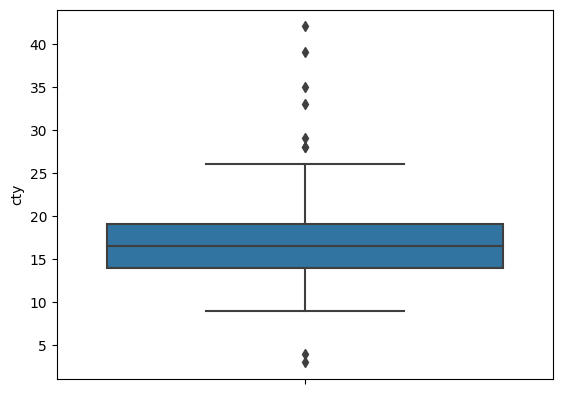

In [15]:
# 극단치를 할당받은 부분 박스플롯으로 확인
sns.boxplot(data=mpg, y='cty')
# 여러 극단치들이 점으로 확인

In [17]:
qt1 = mpg['cty'].quantile(.25) # 위 그래프의 1분위수
qt3 = mpg['cty'].quantile(.75) # 위 그래프의 3분위수
iqr = qt3 - qt1 # 위 그래프이 파란 박스 높이 값 = 5.0

5.0

In [18]:
# 극단치 기준 정하기
outlier_top = qt3 + 1.5 * iqr
outlier_bottom = qt1 - 1.5 * iqr

In [19]:
# numpy를 이용, 극단치를 결측 처리
mpg['cty'] = np.where(mpg['cty'] > outlier_top, np.nan,
                      np.where(mpg['cty'] < outlier_bottom, np.nan, mpg['cty']))

In [20]:
# 결측 처리 확인
mpg.loc[[20,42,128,202]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,NaN,20,r,suv
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,NaN,24,r,minivan
128,jeep,grand cherokee 4wd,5.7,2008,8,auto(l5),4,NaN,18,r,suv
202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,NaN,22,r,pickup


In [23]:
# 결측 처리된 행 제거
mpg = mpg.dropna(subset=['cty'])

In [ ]:
# 제거된 행이기에 에러가 뜬다.
mpg.loc[[20,42,128,202]]

<AxesSubplot: ylabel='cty'>

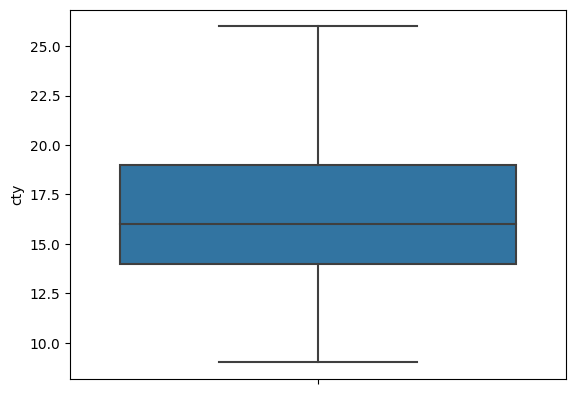

In [25]:
# 다시 박스플롯으로 확인
sns.boxplot(data=mpg,y='cty')

In [ ]:
# 위 그래프에서 극단치인 점이 없는 것을 확인할 수 있음.
# 극단치가 정상적으로 제거된 것을 확인.